# The report about the airport

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
url_1 = 'https://raw.githubusercontent.com/vaibhavwalvekar/NYC-Flights-2013-Dataset-Analysis/master/flights.csv'
url_2 = 'https://raw.githubusercontent.com/vaibhavwalvekar/NYC-Flights-2013-Dataset-Analysis/master/weather.csv'    

flights = pd.read_csv(url_1, sep=',')
weather = pd.read_csv(url_2, sep=',')

In [3]:
flights.head()

,Unnamed: 0,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,1,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,5.0,17.0
1,2,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,5.0,33.0
2,3,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089,5.0,42.0
3,4,2013,1,1,544.0,-1.0,1004.0,-18.0,B6,N804JB,725,JFK,BQN,183.0,1576,5.0,44.0
4,5,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762,5.0,54.0


In [4]:
weather.head()

,Unnamed: 0,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib
0,1,EWR,2013,1.0,1.0,0.0,37.04,21.92,53.97,230.0,10.35702,11.918651,0.0,1013.9,10.0
1,2,EWR,2013,1.0,1.0,1.0,37.04,21.92,53.97,230.0,13.80936,15.891535,0.0,1013.0,10.0
2,3,EWR,2013,1.0,1.0,2.0,37.94,21.92,52.09,230.0,12.65858,14.567241,0.0,1012.6,10.0
3,4,EWR,2013,1.0,1.0,3.0,37.94,23.00,54.51,230.0,13.80936,15.891535,0.0,1012.7,10.0
4,5,EWR,2013,1.0,1.0,4.0,37.94,24.08,57.04,240.0,14.96014,17.215830,0.0,1012.8,10.0


Сколько полётов в месяц?

Text(0.5, 1.0, 'Flights in month')

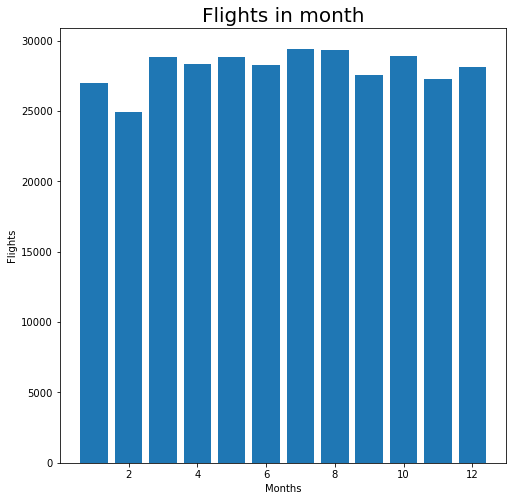

In [37]:
flights_month = flights.groupby('month')['Unnamed: 0']
argument = flights_month.count()
plt.figure(figsize=(8,8))
plt.bar(argument.index, argument)
plt.xlabel('Months')
plt.ylabel('Flights')
plt.title('Flights in month', size=20)

Как влияет скорость ветра на задержки рейсов?

Text(0.5, 1.0, 'The dependence of delays on wind speed')

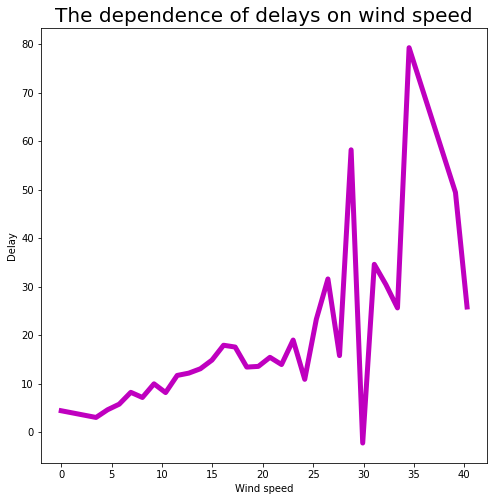

In [38]:
flights_weather = flights.merge(weather, on=['year', 'month', 'day', 'hour', 'origin'], how='inner' )
plt.figure(figsize=(8,8))
wind = pd.DataFrame(flights_weather.groupby('wind_speed')['arr_delay'].mean())
wind.sort_index()
wind = wind.drop(labels=[wind.index[-1]])
plt.plot(wind.index, wind, c = 'm', linewidth=5)
plt.xlabel('Wind speed')
plt.ylabel('Delay')
plt.title('The dependence of delays on wind speed', size =20)

Как влияет температура на задержки рейсов?

Text(0.5, 1.0, 'The dependence of delays on temperature')

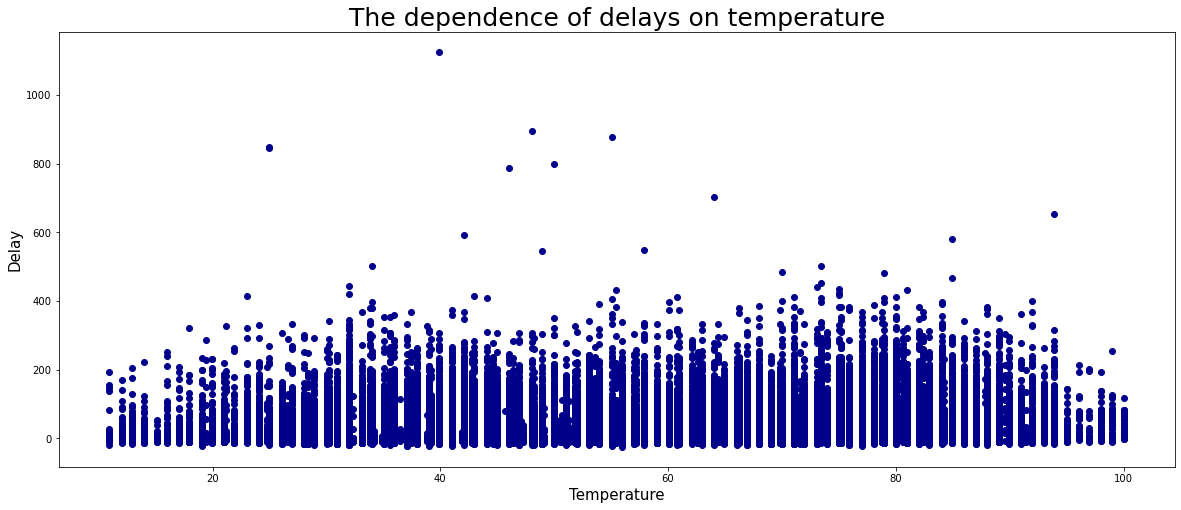

In [39]:
plt.figure(figsize=(20,8))
plt.scatter(flights_weather['temp'], flights_weather['dep_delay'], c='darkblue')
plt.xlabel('Temperature', size=15)
plt.ylabel('Delay', size=15)
plt.title('The dependence of delays on temperature', size=25)

Каковы задержки у разных аэропортов?

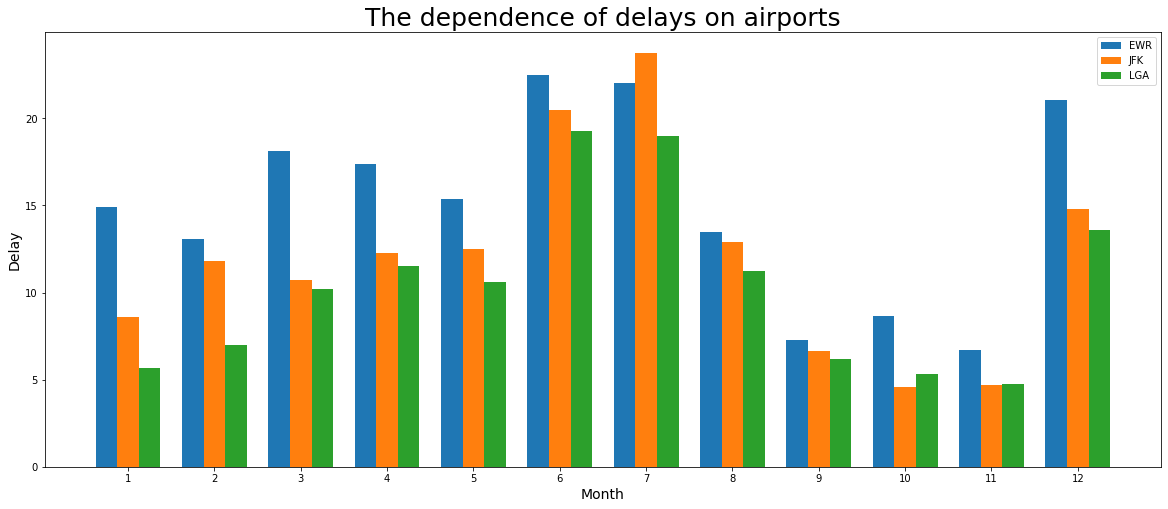

In [44]:
EWR = flights[flights.origin == 'EWR'].groupby('month')['dep_delay'].mean()
JFK = flights[flights.origin == 'JFK'].groupby('month')['dep_delay'].mean()
LGA = flights[flights.origin == 'LGA'].groupby('month')['dep_delay'].mean()
plt.figure(figsize=(20,8))
width = 0.25
plt.bar(EWR.index, EWR, width, label='EWR')
plt.bar(JFK.index + width, JFK, width, label='JFK')
plt.bar(LGA.index + 2*width, LGA, width, label='LGA')
plt.xticks(EWR.index + width, EWR.index)
plt.xlabel('Month', size=14)
plt.ylabel('Delay', size=14)
plt.title('The dependence of delays on airports', size=25)
plt.legend(loc='upper right')

Каковы задержки в зависимости от месяца?

Text(0.5, 1.0, 'Average delay per month in bar')

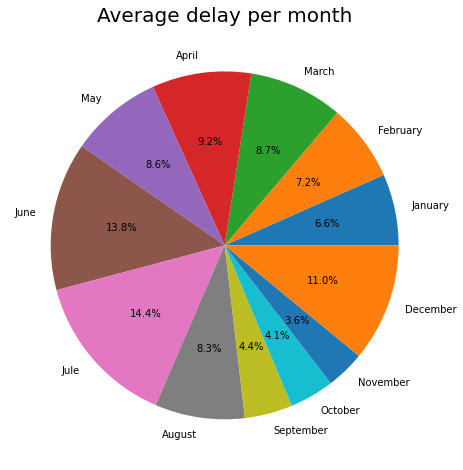

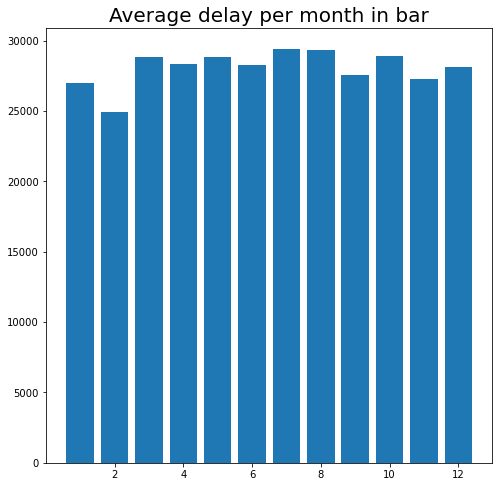

In [40]:
flights_months = flights.groupby("month")
delay = flights_months['dep_delay'].mean()
labels = ["January", "February", "March", "April", "May", "June", "Jule", "August",
          "September", "October", "November", "December" ]
plt.figure(figsize=(8,8))
plt.pie(delay, labels = labels, autopct='%1.1f%%')
plt.title('Average delay per month', size=20)

argument = flights_month.count()
plt.figure(figsize=(8,8))
plt.bar(argument.index, argument)
plt.title('Average delay per month in bar', size=20)

Из диаграммы видно, что основная часть задержек в период летних отпуков, майских и новогодних праздников.